In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import time
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
df = pd.read_csv("./Pokemon.csv")
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [3]:
df = df.drop('#', axis=1)
df['Type 2'].fillna('None', inplace=True)

df.rename(columns={
    'Type 1': 'Type1',
    'Type 2': 'Type2',
    'Sp. Atk': 'Sp_Atk',
    'Sp. Def': 'Sp_Def'
}, inplace=True)

print("Veri Temizlendi! Son durum:")
df.info()

print("\nTemizlenmiş verinin ilk 5 satırı:")
print(df.head())

Veri Temizlendi! Son durum:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        800 non-null    object
 1   Type1       800 non-null    object
 2   Type2       800 non-null    object
 3   Total       800 non-null    int64 
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp_Atk      800 non-null    int64 
 8   Sp_Def      800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB

Temizlenmiş verinin ilk 5 satırı:
                    Name  Type1   Type2  Total  HP  Attack  Defense  Sp_Atk  \
0              Bulbasaur  Grass  Poison    318  45      49       49      65   
1                Ivysaur  Grass  Poison    405  60    

C:\Users\MahmutMilayim\AppData\Local\Temp\ipykernel_50916\4214485415.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Type 2'].fillna('None', inplace=True)


C:\Users\MahmutMilayim\AppData\Local\Temp\ipykernel_50916\2589812211.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Type1', order=df['Type1'].value_counts().index, palette='viridis')


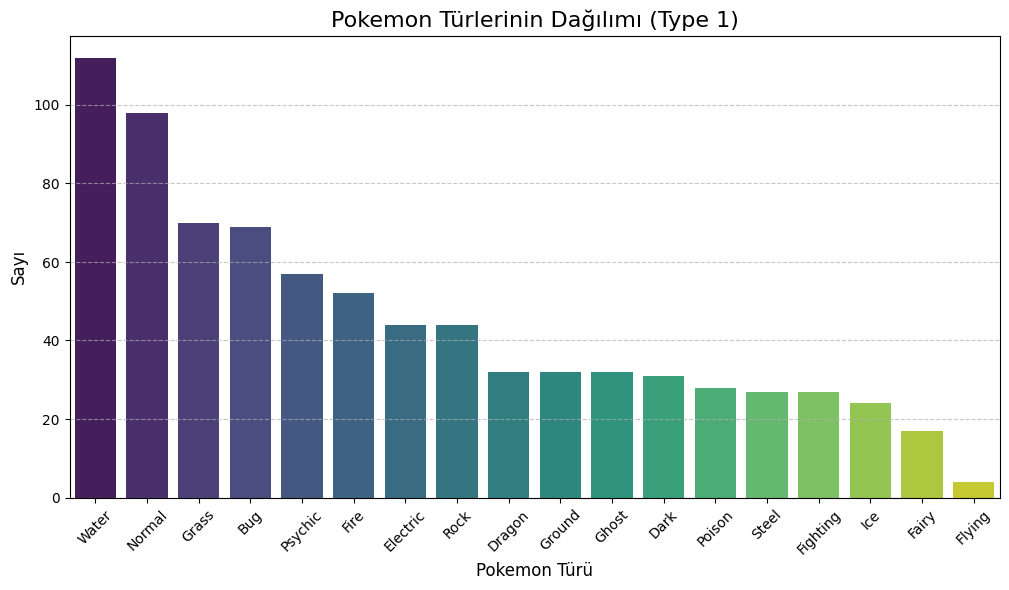

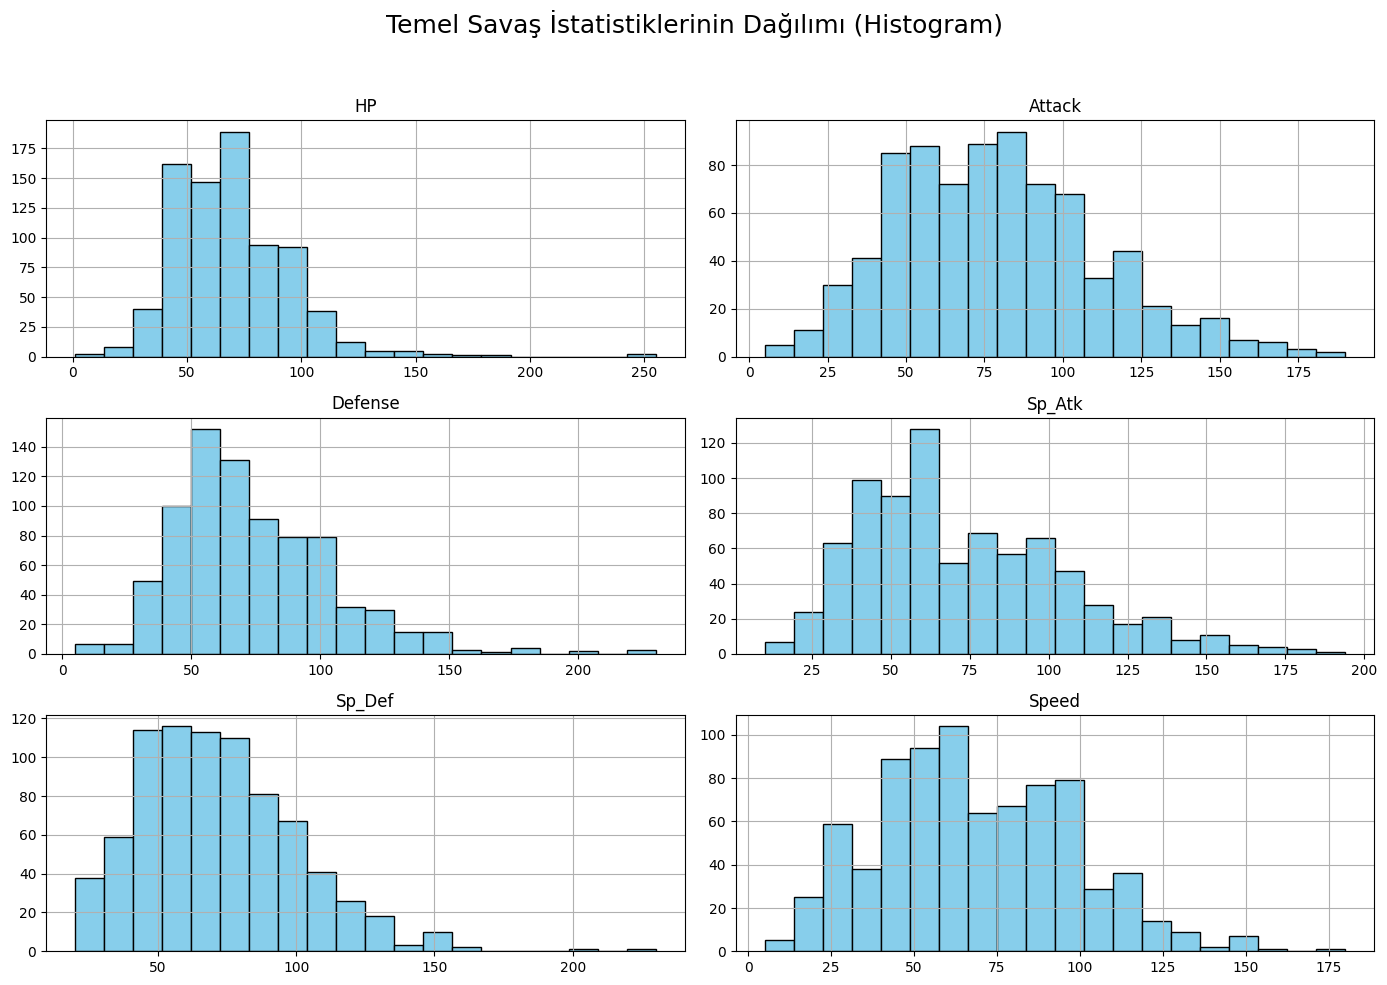

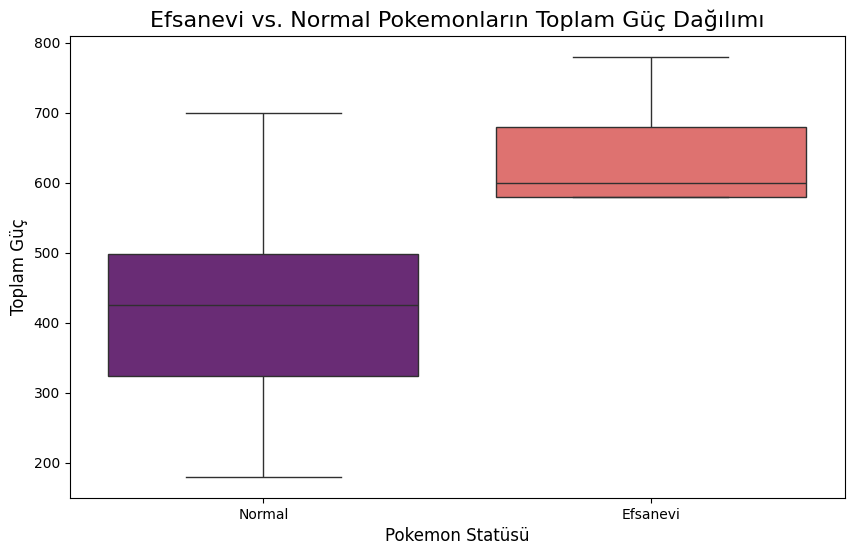

Görselleştirme tamamlandı!


In [4]:
#Görselleştirme

#Pokemon Türlerinin Dağılımı (Type 1'e göre)
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Type1', order=df['Type1'].value_counts().index, palette='viridis')
plt.title('Pokemon Türlerinin Dağılımı (Type 1)', fontsize=16)
plt.xlabel('Pokemon Türü', fontsize=12)
plt.ylabel('Sayı', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#Temel Savaş İstatistiklerinin Dağılımı
stats_df = df[['HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed']]
stats_df.hist(figsize=(14, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Temel Savaş İstatistiklerinin Dağılımı (Histogram)', size=18)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#Efsanevi (Legendary) Olan ve Olmayanların Güç Karşılaştırması
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Legendary', y='Total', hue='Legendary', palette='magma', legend=False)
plt.title('Efsanevi vs. Normal Pokemonların Toplam Güç Dağılımı', size=16)
plt.xticks([0, 1], ['Normal', 'Efsanevi']) #Eksen etiketlerini daha anlaşılır yap
plt.xlabel('Pokemon Statüsü', fontsize=12)
plt.ylabel('Toplam Güç', fontsize=12)
plt.show()

print("Görselleştirme tamamlandı!")

In [5]:
#Değerler: 2 = Süper Etkili, 1 = Normal, 0.5 = Etkisiz, 0 = Hiç Etkilemez
type_chart = {
    'Normal': {'Rock': 0.5, 'Ghost': 0, 'Steel': 0.5},
    'Fire': {'Fire': 0.5, 'Water': 0.5, 'Grass': 2, 'Ice': 2, 'Bug': 2, 'Rock': 0.5, 'Dragon': 0.5, 'Steel': 2},
    'Water': {'Fire': 2, 'Water': 0.5, 'Grass': 0.5, 'Ground': 2, 'Rock': 2, 'Dragon': 0.5},
    'Electric': {'Water': 2, 'Electric': 0.5, 'Grass': 0.5, 'Ground': 0, 'Flying': 2, 'Dragon': 0.5},
    'Grass': {'Fire': 0.5, 'Water': 2, 'Grass': 0.5, 'Poison': 0.5, 'Ground': 2, 'Flying': 0.5, 'Bug': 0.5, 'Rock': 2, 'Dragon': 0.5, 'Steel': 0.5},
    'Ice': {'Fire': 0.5, 'Water': 0.5, 'Grass': 2, 'Ice': 0.5, 'Ground': 2, 'Flying': 2, 'Dragon': 2, 'Steel': 0.5},
    'Fighting': {'Normal': 2, 'Ice': 2, 'Poison': 0.5, 'Flying': 0.5, 'Psychic': 0.5, 'Bug': 0.5, 'Rock': 2, 'Ghost': 0, 'Dark': 2, 'Steel': 2, 'Fairy': 0.5},
    'Poison': {'Grass': 2, 'Poison': 0.5, 'Ground': 0.5, 'Rock': 0.5, 'Ghost': 0.5, 'Steel': 0, 'Fairy': 2},
    'Ground': {'Fire': 2, 'Electric': 2, 'Grass': 0.5, 'Poison': 2, 'Flying': 0, 'Bug': 0.5, 'Rock': 2, 'Steel': 2},
    'Flying': {'Electric': 0.5, 'Grass': 2, 'Fighting': 2, 'Bug': 2, 'Rock': 0.5, 'Steel': 0.5},
    'Psychic': {'Fighting': 2, 'Poison': 2, 'Psychic': 0.5, 'Dark': 0, 'Steel': 0.5},
    'Bug': {'Fire': 0.5, 'Grass': 2, 'Fighting': 0.5, 'Poison': 0.5, 'Flying': 0.5, 'Psychic': 2, 'Ghost': 0.5, 'Dark': 2, 'Steel': 0.5, 'Fairy': 0.5},
    'Rock': {'Fire': 2, 'Ice': 2, 'Fighting': 0.5, 'Ground': 0.5, 'Flying': 2, 'Bug': 2, 'Steel': 0.5},
    'Ghost': {'Normal': 0, 'Psychic': 2, 'Ghost': 2, 'Dark': 0.5},
    'Dragon': {'Dragon': 2, 'Steel': 0.5, 'Fairy': 0},
    'Dark': {'Fighting': 0.5, 'Psychic': 2, 'Ghost': 2, 'Dark': 0.5, 'Fairy': 0.5},
    'Steel': {'Fire': 0.5, 'Water': 0.5, 'Electric': 0.5, 'Ice': 2, 'Rock': 2, 'Steel': 0.5, 'Fairy': 2},
    'Fairy': {'Fire': 0.5, 'Fighting': 2, 'Poison': 0.5, 'Dragon': 2, 'Dark': 2, 'Steel': 0.5}
}

#Tür etkileşimini hesaplayan bir fonksiyon
def calculate_type_effectiveness(attacker_types, defender_types):
    effectiveness = 1
    for att_type in attacker_types:
        if att_type == 'None': continue
        current_effectiveness = 1
        for def_type in defender_types:
            if def_type == 'None': continue
            #type_chart'ı kontrol et
            multiplier = type_chart.get(att_type, {}).get(def_type, 1) #Varsayılan 1 (Normal Etki)
            current_effectiveness *= multiplier
        effectiveness = max(effectiveness, current_effectiveness) #Eğer çift türlüyse en yüksek etkiyi al
    return effectiveness

In [6]:
# ---BENZERSİZ SAVAŞ VERİSİ OLUŞTURMA---
print("Geliştirilmiş ve benzersiz savaş verisi oluşturuluyor...")
total_pokemon_count = len(df)
desired_battle_count = 50000
unique_battles = set()

#Bu döngü, 50,000 tane birbirinden farklı savaş çifti oluşturur
while len(unique_battles) < desired_battle_count:
    p_indices = np.random.choice(total_pokemon_count, 2, replace=False)
    battle_pair = tuple(sorted(p_indices)) #(A,B) ve (B,A) tekrarını önlemek için sırala
    unique_battles.add(battle_pair)
    if len(unique_battles) % 10000 == 0 and len(unique_battles) > 0:
        print(f"...{len(unique_battles)} benzersiz savaş oluşturuldu...")

battle_list = list(unique_battles)
battles_df = pd.DataFrame(battle_list, columns=['PokemonA_ID', 'PokemonB_ID'])

#Ham veri oluşturma (her iki pokemonun tüm özelliklerini birleştirme)
poke_a_stats = df.iloc[battles_df['PokemonA_ID']].reset_index(drop=True).add_suffix('_A')
poke_b_stats = df.iloc[battles_df['PokemonB_ID']].reset_index(drop=True).add_suffix('_B')
full_battle_df = pd.concat([poke_a_stats, poke_b_stats], axis=1)

#Sızıntısız kazanan belirleme (Olasılıksal yöntem)
winners = []
for index, row in full_battle_df.iterrows():
    #Gerekli fonksiyonlar ve tabloların daha önceki bir hücrede tanımlı olduğunu varsayıyoruz
    a_vs_b = calculate_type_effectiveness([row['Type1_A'], row['Type2_A']], [row['Type1_B'], row['Type2_B']])
    b_vs_a = calculate_type_effectiveness([row['Type1_B'], row['Type2_B']], [row['Type1_A'], row['Type2_A']])
    net_type_advantage = a_vs_b - b_vs_a
    battle_score = (row['Total_A'] - row['Total_B']) + (row['Speed_A'] - row['Speed_B']) + (net_type_advantage * 100)
    win_probability_A = 1 / (1 + math.exp(-battle_score / 100))
    winner = 1 if np.random.rand() > win_probability_A else 0
    winners.append(winner)
full_battle_df['Winner'] = winners

#Modelleme için son hazırlıklar
X_raw = full_battle_df.drop(['Name_A', 'Name_B', 'Winner'], axis=1)
y = full_battle_df['Winner']
X_encoded = pd.get_dummies(X_raw)



Geliştirilmiş ve benzersiz savaş verisi oluşturuluyor...
...10000 benzersiz savaş oluşturuldu...
...20000 benzersiz savaş oluşturuldu...
...30000 benzersiz savaş oluşturuldu...
...40000 benzersiz savaş oluşturuldu...
...50000 benzersiz savaş oluşturuldu...


In [7]:
# ---EN DOĞRU MODEL SEÇME VE TEST ETME---

#VERİYİ BİR KERE BAŞTA AYIRMA
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

#HİPERPARAMETRE ARAMA UZAYINI TANIMLAMA
#GridSearchCV'ye denemesi için farklı ayar seçenekleri sunalım
param_grid = {
    'n_estimators': [200, 400],    #Ağaç sayısı
    'max_depth': [15, 25],         #Ağaç derinliği
    'min_samples_leaf': [5, 10]    #Yapraktaki minimum örnek
}

#GridSearchCV'Yİ KURMA
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)

#GridSearchCV aracını kur. cv=3, her kombinasyonu 3-katlı CV ile test et demek
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

print("GridSearchCV ile en iyi model ayarları aranıyor...")
print(f"Denecek kombinasyon sayısı: {len(param_grid['n_estimators']) * len(param_grid['max_depth']) * len(param_grid['min_samples_leaf'])}. Her biri 3-katlı CV ile test edilecek.")

start_time_gs = time.time()
#GridSearchCV'yi SADECE EĞİTİM VERİSİ üzerinde çalıştır
grid_search.fit(X_train, y_train)
end_time_gs = time.time()
gs_time = end_time_gs - start_time_gs

print("En iyi ayarlar bulundu!")

#EN İYİ MODELİ SEÇME VE SONUÇLARI GÖSTERME
print("\nBulunan En İyi Parametreler:")
print(grid_search.best_params_)

#En iyi model, grid_search.best_estimator_ içinde hazır olarak bulunur.
best_model = grid_search.best_estimator_

#Bu en iyi modeli TEST VERİSİ üzerinde test et
print("\nEn iyi model, final testi için kullanılıyor...")
y_pred_final = best_model.predict(X_test)

final_accuracy = accuracy_score(y_test, y_pred_final)

print(f"En İyi Modelin Test Verisi Üzerindeki Doğruluğu: {final_accuracy:.4f}")
print(f"Toplam En İyi Ayarı Bulma Süresi: {gs_time:.2f} saniye")

print("\nDetaylı Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred_final))

GridSearchCV ile en iyi model ayarları aranıyor...
Denecek kombinasyon sayısı: 8. Her biri 3-katlı CV ile test edilecek.
Fitting 3 folds for each of 8 candidates, totalling 24 fits
En iyi ayarlar bulundu!

Bulunan En İyi Parametreler:
{'max_depth': 25, 'min_samples_leaf': 10, 'n_estimators': 200}

En iyi model, final testi için kullanılıyor...
En İyi Modelin Test Verisi Üzerindeki Doğruluğu: 0.7681
Toplam En İyi Ayarı Bulma Süresi: 50.66 saniye

Detaylı Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.77      0.73      0.75      4730
           1       0.77      0.80      0.78      5270

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000

